In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f1 = r.TFile("./data/withTimeCorrection.root")
t1 = f1.Get("nearlineHistTree/eventTree")

f2 = r.TFile("./data/noTimeCorrection.root")
t2 = f2.Get("nearlineHistTree/eventTree")

t2.SetLineColor(2)
t2.SetMarkerColor(2)

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available
Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSBeamProfileArtRecord is available


# sync pulse times in calo 7-9 before/after time correction
---

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


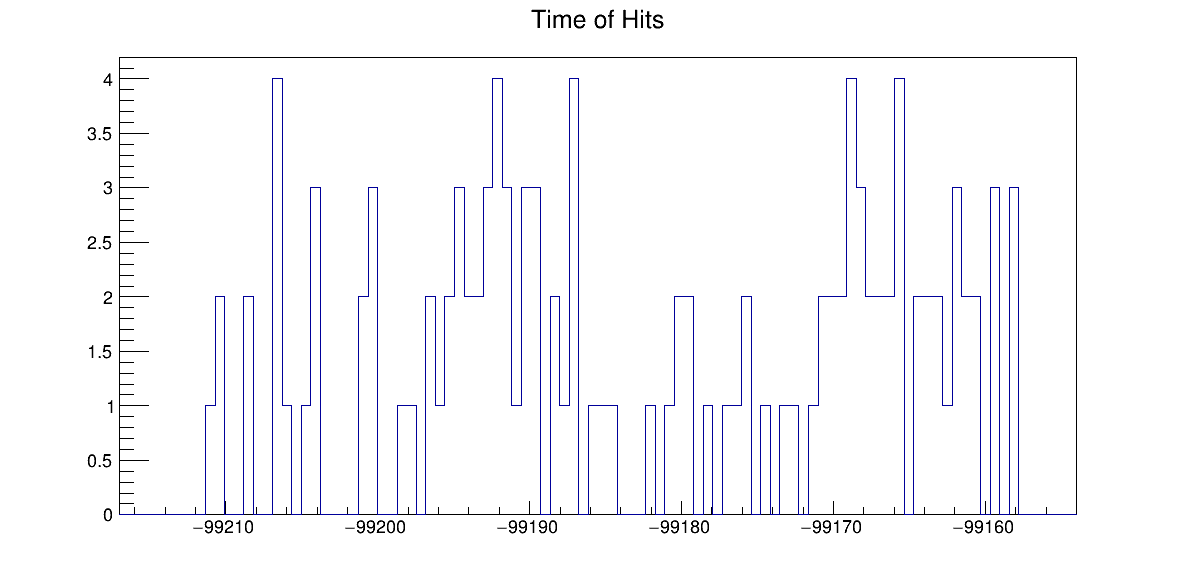

In [25]:
h = r.TH1D("h","Time of Hits",100,-99200,-99300)
#h = r.TH1D("h","Time of Hits",1000,5000,6000)
c = r.TCanvas("c","c",1200, 600)
xtalEnergies = []
for i, calo in enumerate([7,8,9]):
    h.Reset()
    if(i>0):
        opt = "same"
    else:
        opt = ""
    t2.SetLineColor(calo)
    t1.Draw("time>>h","time < 0 && energy > 20000 && caloNum == "+str(calo),opt)
    xtalEnergies.append(h.Clone("h_"+str(calo)))
c.Draw()

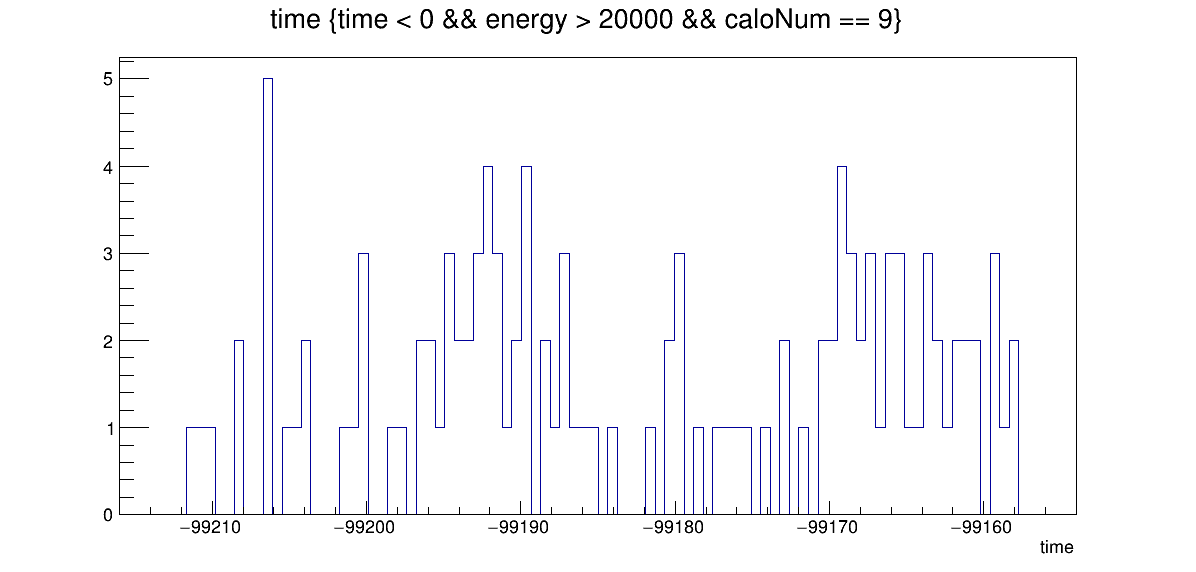

In [26]:
t1.Draw("time","time < 0 && energy > 20000 && caloNum == "+str(calo),"")
c.Draw()

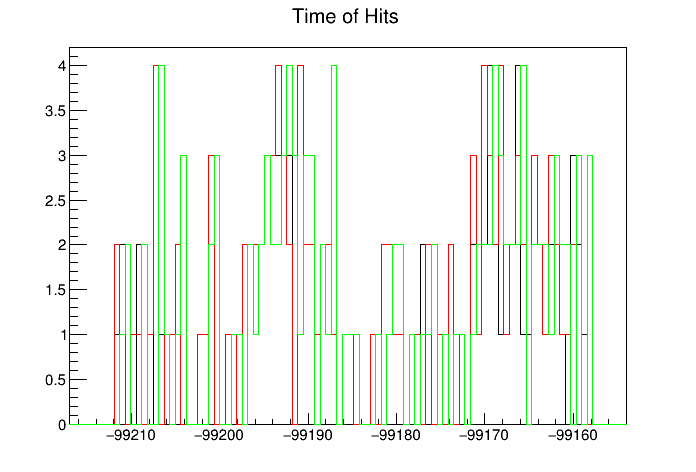

In [27]:
c = r.TCanvas()
for i, h in enumerate(xtalEnergies):
    h.SetLineColor(i+1)
    h.GetXaxis().SetRangeUser(5550,5610)
    if(i>0):
        opt = "same"
    else:
        opt = ""
    h.Draw(opt)
c.Draw()

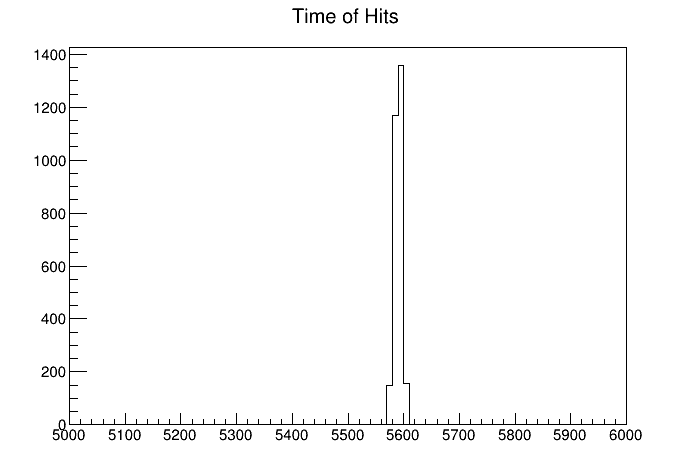

In [12]:
c = r.TCanvas()
xtalEnergies[0].Draw()
c.Draw()